#### Install Libraries

In [1]:
""" Uncomment and run !pip installs """
""" pip installs only need to be done once on your computer """
#!pip install geopandas
#!pip install contextily
#!pip install mapclassify
#!pip install folium
#!pip install aiohttp
#!pip install fsspec

' pip installs only need to be done once on your computer '

#### Import Libraries

In [2]:
# Import libraries 

import geopandas as gpd 
import pandas as pd
import matplotlib.pyplot as plt
import contextily 
import mapclassify 
import folium 
import fsspec

#### Load GeoDataFrame

In [3]:
# 1
# Run cell to load geopandas dataframe (location geometry shapes)

import geopandas as gpd
import fsspec

data = "https://github.com/babdelfa/gis/blob/main/state_geometry.zip?raw=true"

with fsspec.open(data) as file:
    state_shapes = gpd.read_file(file)

print("Data Type is GeoDataframe:", type(state_shapes))

state_shapes.head() # view states data

Data Type is GeoDataframe: <class 'geopandas.geodataframe.GeoDataFrame'>


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


<AxesSubplot:>

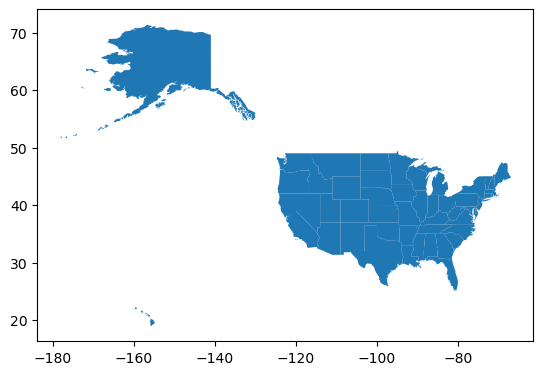

In [4]:
# 2
# Display states using the plot() method 

state_shapes.plot()

In [5]:
# 3
# View crs (location metrics) - use the crs attribute 
# note: decimal degrees (crs="EPSG:4269") & meters (crs="EPSG:3857") 

print(state_shapes.crs)

EPSG:4269


,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
40,Texas,41,48,West South Central,TX,"MULTIPOLYGON (((-105.99889 31.39394, -106.2132..."


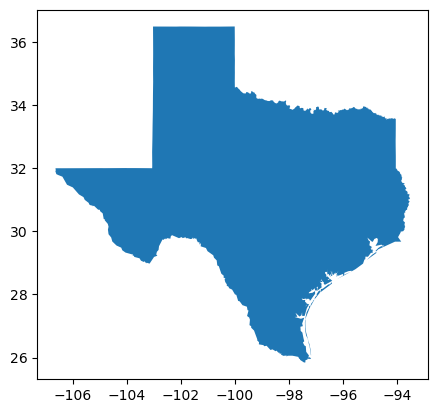

In [6]:
# 4
# Subset Texas to tx
# plot the subset

tx = state_shapes[state_shapes.STATE_NAME == "Texas"].copy()
tx.plot()
tx

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
34,Virginia,35,51,South Atlantic,VA,"MULTIPOLYGON (((-79.14406 36.54620, -79.21680 ..."


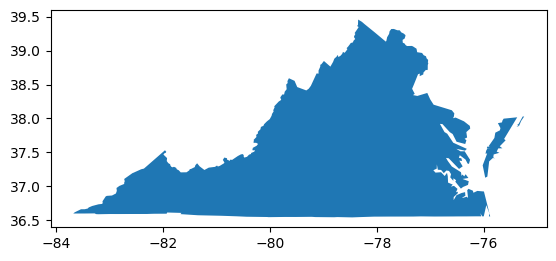

In [7]:
# 5
# Subset Virginia to va
# plot the subset

va = state_shapes[state_shapes.STATE_NAME == "Virginia"].copy()
va.plot()
va

In [8]:
# 6
# Convert crs to 3857  using to_crs() method for VA and TX
# This will make the geometry column (location data) in meters instead of decimal degrees

va.to_crs(3857, inplace=True)
tx.to_crs(3857, inplace=True)

In [9]:
# View the geometry data column VA and TX
va
tx

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
40,Texas,41,48,West South Central,TX,"MULTIPOLYGON (((-11799742.047 3684016.174, -11..."


In [10]:
# 7
# View the area for Texas using the area attribute
tx.area

40    9.466702e+11
dtype: float64

In [11]:
# 8
# Pandas function to format number in scientific notation 
# Run cell
pd.set_option('display.float_format',  '{:,.2f}'.format) # format display of numbers
tx.area

40   946,670,191,009.36
dtype: float64

In [12]:
# 9
# Find the distance between two locations (VA and TX) using the distance method

tx.geometry.iloc[0].distance(va.geometry.iloc[0])

1225417.4685618815

In [13]:
# 10
# Convert to miles (one mile = 1609.34 meters)
# Run 
tx.geometry.iloc[0].distance(va.geometry.iloc[0]) / 1609.34

761.4410059787748

In [14]:
# 11
# To find the center points of a location, use the centroid attribute 

tx.centroid


40    POINT (-11061404.661 3706715.960)
dtype: geometry

#### Load dataframe, merge with geodataframe, and display choropleth map

In [15]:
# 1
# load DataFrame

# source data "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"

data = "https://raw.githubusercontent.com/babdelfa/gis/main/covid.csv"
df = pd.read_csv(data)
df  

,UID,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,date,cases
0,84001001,"1,001.00",Autauga,Alabama,US,32.54,-86.64,"Autauga, Alabama, US",11/13/2022,18571
1,84001003,"1,003.00",Baldwin,Alabama,US,30.73,-87.72,"Baldwin, Alabama, US",11/13/2022,66213
2,84001005,"1,005.00",Barbour,Alabama,US,31.87,-85.39,"Barbour, Alabama, US",11/13/2022,6950
3,84001007,"1,007.00",Bibb,Alabama,US,33.00,-87.13,"Bibb, Alabama, US",11/13/2022,7604
4,84001009,"1,009.00",Blount,Alabama,US,33.98,-86.57,"Blount, Alabama, US",11/13/2022,17386
...,...,...,...,...,...,...,...,...,...,...
3337,84056039,"56,039.00",Teton,Wyoming,US,43.94,-110.59,"Teton, Wyoming, US",11/13/2022,11851
3338,84056041,"56,041.00",Uinta,Wyoming,US,41.29,-110.55,"Uinta, Wyoming, US",11/13/2022,6210
3339,84090056,"90,056.00",Unassigned,Wyoming,US,0.00,0.00,"Unassigned, Wyoming, US",11/13/2022,0
3340,84056043,"56,043.00",Washakie,Wyoming,US,43.90,-107.68,"Washakie, Wyoming, US",11/13/2022,2681


In [16]:
# 2a
# Subset any state 

state = df[df.Province_State == "Virginia"]
state

,UID,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,date,cases
3010,84051001,"51,001.00",Accomack,Virginia,US,37.77,-75.63,"Accomack, Virginia, US",11/13/2022,8368
3011,84051003,"51,003.00",Albemarle,Virginia,US,38.02,-78.55,"Albemarle, Virginia, US",11/13/2022,23504
3012,84051510,"51,510.00",Alexandria,Virginia,US,38.81,-77.08,"Alexandria, Virginia, US",11/13/2022,42491
3013,84051005,"51,005.00",Alleghany,Virginia,US,37.79,-80.00,"Alleghany, Virginia, US",11/13/2022,4166
3014,84051007,"51,007.00",Amelia,Virginia,US,37.34,-77.99,"Amelia, Virginia, US",11/13/2022,3285
...,...,...,...,...,...,...,...,...,...,...
3140,84051830,"51,830.00",Williamsburg,Virginia,US,37.28,-76.71,"Williamsburg, Virginia, US",11/13/2022,2183
3141,84051840,"51,840.00",Winchester,Virginia,US,39.17,-78.17,"Winchester, Virginia, US",11/13/2022,7650
3142,84051195,"51,195.00",Wise,Virginia,US,36.97,-82.62,"Wise, Virginia, US",11/13/2022,13087
3143,84051197,"51,197.00",Wythe,Virginia,US,36.92,-81.08,"Wythe, Virginia, US",11/13/2022,9041


In [17]:
# 2b
# Determine the total number of cases as of 11/13/2022.
# Note: The state variable contains cases for each county as of 11/13/2022.
# Use the sum() method on state cases

state.cases.sum()

2131894

In [18]:
# 3 
# Aggregate the df dataframe from county level to state level
# Run cell
state_cases = df.groupby(["Province_State"], as_index=False).cases.sum()
state_cases

,Province_State,cases
0,Alabama,1540329
1,Alaska,298651
2,American Samoa,8260
3,Arizona,2300375
4,Arkansas,963740
5,California,11412662
6,Colorado,1686624
7,Connecticut,918761
8,Delaware,314684
9,Diamond Princess,49


In [19]:
# View columns of state_cases DataFrame and state_shapes GeoDataFrame
# Run cell
print(state_cases.columns)
print(state_shapes.columns)

Index(['Province_State', 'cases'], dtype='object')
Index(['STATE_NAME', 'DRAWSEQ', 'STATE_FIPS', 'SUB_REGION', 'STATE_ABBR',
       'geometry'],
      dtype='object')


In [20]:
# 4
# Merge the state_shapes geodataframe with aggregated state-level dataframe.
# The first argument in merge should be the geodataframe.
#        This will keep the geodataframe data type.
# Note: columns labels are different but have similiar data (e.g., STATE_NAME and Province_State )

gdf = pd.merge(state_shapes, state_cases, left_on = ["STATE_NAME"], right_on = ["Province_State"])
gdf

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,Province_State,cases
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",Hawaii,364122
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",Washington,1843908
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",Montana,315421
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",Maine,299501
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",North Dakota,274701
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",South Dakota,265890
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",Wyoming,179366
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ...",Wisconsin,1909295
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",Idaho,502105
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747...",Vermont,145838


In [21]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [22]:
# 5 
# Use the explore method on the GeoDataframe, gdf, to project the choropleth map of state cases 

gdf.explore(column="cases", cmap="Set2", legend=True, scheme='EqualInterval')

In [23]:
df

,UID,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,date,cases
0,84001001,"1,001.00",Autauga,Alabama,US,32.54,-86.64,"Autauga, Alabama, US",11/13/2022,18571
1,84001003,"1,003.00",Baldwin,Alabama,US,30.73,-87.72,"Baldwin, Alabama, US",11/13/2022,66213
2,84001005,"1,005.00",Barbour,Alabama,US,31.87,-85.39,"Barbour, Alabama, US",11/13/2022,6950
3,84001007,"1,007.00",Bibb,Alabama,US,33.00,-87.13,"Bibb, Alabama, US",11/13/2022,7604
4,84001009,"1,009.00",Blount,Alabama,US,33.98,-86.57,"Blount, Alabama, US",11/13/2022,17386
...,...,...,...,...,...,...,...,...,...,...
3337,84056039,"56,039.00",Teton,Wyoming,US,43.94,-110.59,"Teton, Wyoming, US",11/13/2022,11851
3338,84056041,"56,041.00",Uinta,Wyoming,US,41.29,-110.55,"Uinta, Wyoming, US",11/13/2022,6210
3339,84090056,"90,056.00",Unassigned,Wyoming,US,0.00,0.00,"Unassigned, Wyoming, US",11/13/2022,0
3340,84056043,"56,043.00",Washakie,Wyoming,US,43.90,-107.68,"Washakie, Wyoming, US",11/13/2022,2681


In [24]:
state_shapes

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747..."


In [25]:
gdf[["STATE_NAME", "STATE_ABBR", "geometry", "cases"]]

,STATE_NAME,STATE_ABBR,geometry,cases
0,Hawaii,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",364122
1,Washington,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",1843908
2,Montana,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",315421
3,Maine,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",299501
4,North Dakota,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",274701
5,South Dakota,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",265890
6,Wyoming,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",179366
7,Wisconsin,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ...",1909295
8,Idaho,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",502105
9,Vermont,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747...",145838


#### Counties Level Shapes Data

<class 'geopandas.geodataframe.GeoDataFrame'>
   OBJECTID  FIPS_BEA  Shape_Leng  Shape_Area  \
0         1  1,001.00        2.02        0.15   
1         2  1,003.00        4.24        0.41   
2         3  1,005.00        2.44        0.22   
3         4  1,007.00        1.89        0.16   
4         5  1,009.00        2.33        0.16   

                                            geometry  
0  POLYGON ((-86.41312 32.70739, -86.41304 32.687...  
1  POLYGON ((-87.76515 31.29735, -87.76360 31.297...  
2  POLYGON ((-85.35541 32.14717, -85.32444 32.147...  
3  POLYGON ((-87.06574 33.24691, -87.04483 33.246...  
4  POLYGON ((-86.48693 34.26021, -86.45288 34.259...  


<AxesSubplot:>

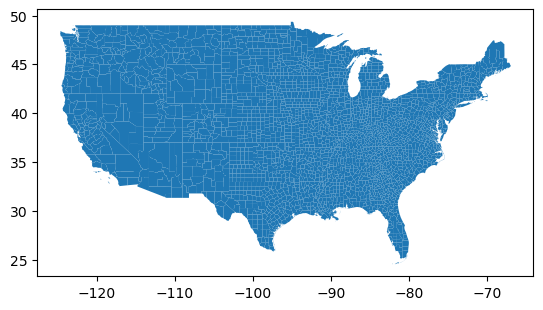

In [26]:
# 
# Run cell
# geodataframe of county geometry shapes 
# this will load a geopandas dataframe

c = "https://github.com/babdelfa/gis/blob/main/counties_geometry.zip?raw=true"

with fsspec.open(c) as file:
    county_shapes = gpd.read_file(file)

print(type(county_shapes))

print(county_shapes.head()) # the data

county_shapes.plot()  # project the map